In [2]:
pip install opencv-python

     |████████████████████████████████| 51.0 MB 39 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import glob
import cv2 as cv
import numpy as np
from tqdm import notebook
from matplotlib import pyplot as plt
import argparse

In [4]:
first_frame = cv.imread('imagespng/0image.png')

|          | 0/? [00:00<?, ?it/s]

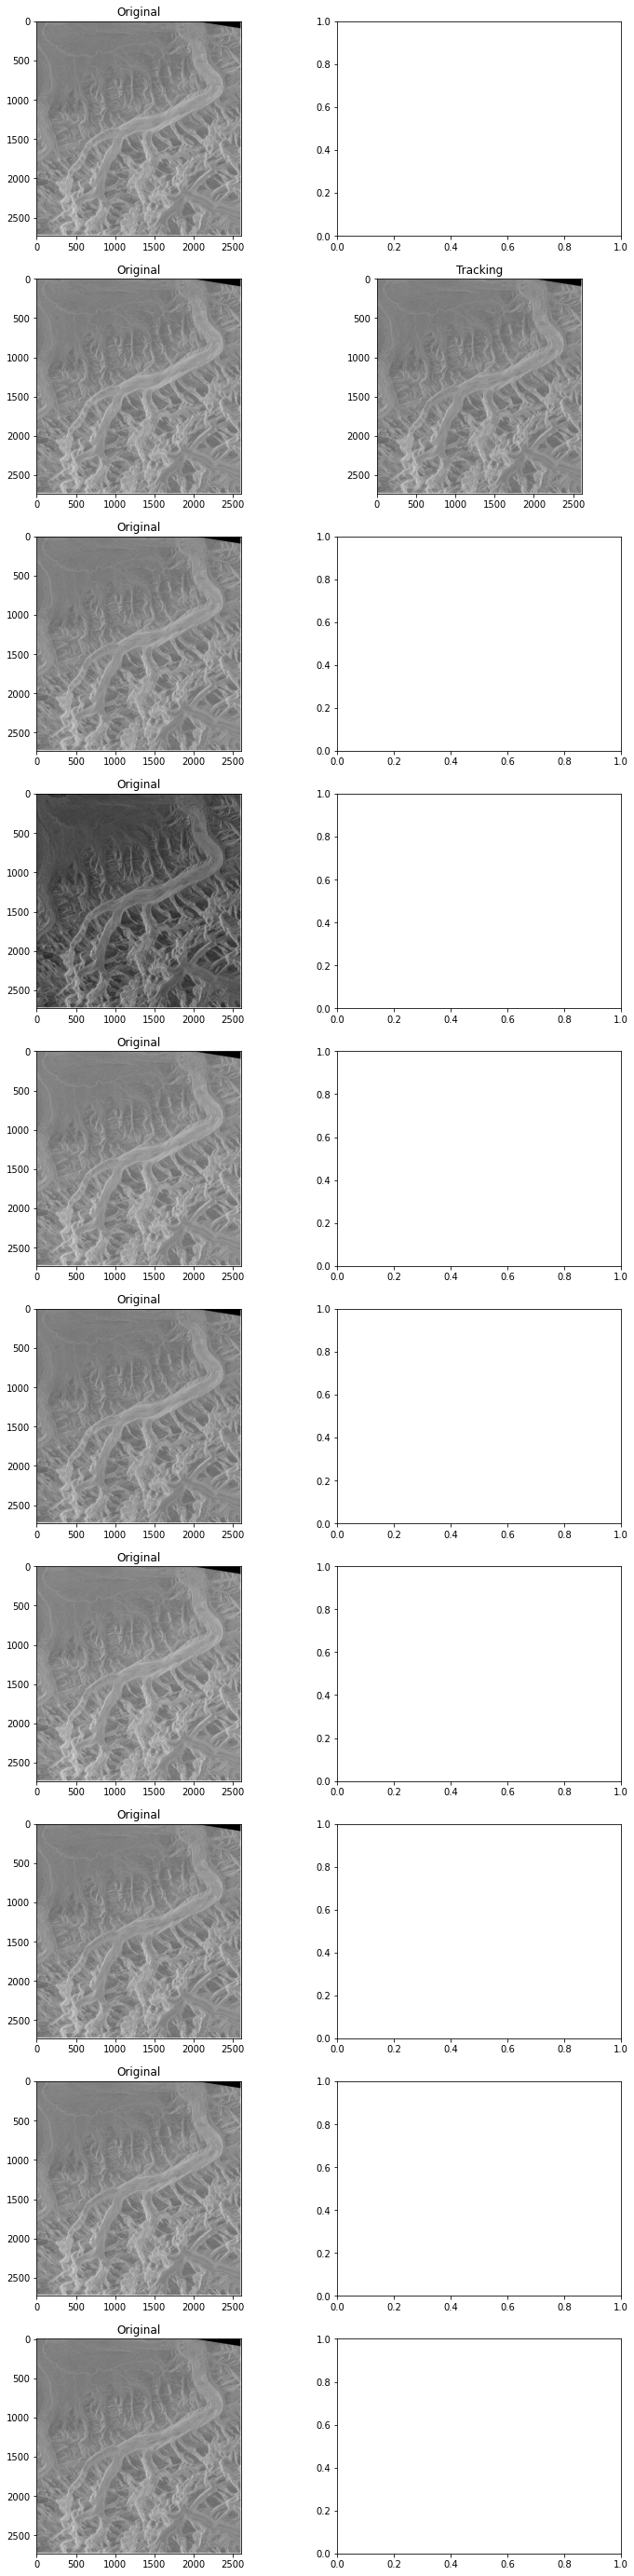

In [27]:
first_frame = cv.imread('imagespng/0image.png')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

old_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(first_frame)

f,ax=plt.subplots(len(glob.glob('imagespng/*.png')),2,figsize=(12,50))
for i, filename in notebook.tqdm(enumerate(glob.glob('imagespng/*.png'))): 
    frame = cv.imread(filename)
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    ax[i,0].imshow(frame)
    ax[i,0].set_title('Original')
    
    
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
       # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
        
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    
    ax[i,1].imshow(img)
    ax[i,1].set_title('Tracking')
      
    old_gray = frame_gray





In [ ]:
0image.png


    

In [25]:
parser = argparse.ArgumentParser(description='Lucas-Kanada Optical Flow Calculation.')
parser.add_argument('image', type=str, help='path to image file')


_StoreAction(option_strings=[], dest='image', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='path to image file', metavar=None)